# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LOADING DATASET

In [2]:
#MEMBACA DATASET
data = pd.read_excel('finalproject.xlsx', sheet_name=1)
data.head(20)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


# DATA QUALITY CHECKING

In [3]:
#Mengetahui jumlah baris dan kolom
data.shape

(5630, 20)

In [4]:
#Mengetahui informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

1. data terlihat ada beberapa missing value dan harus diatasi (tidak bisa dihapus karena data missing total diatas 10% dari jumlah data)

2. ada data yang terlihat invalid values yaitu WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder karena seharusnya data bertipe integer.

3. variable data ini masih mengandung 2 tipe data yaitu string dan numerikal, untuk dari itu perlu dibagi menjadi 2 agar dapat dilakukan statistika deskriptif sehingga dapat melihat karakteristik data itu sendiri.

In [5]:
#Mengecek total missing value
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [6]:
#Mengecek total data duplikat
data.duplicated().sum()

0

# EXPLORATORY DATA ANALYSIS

In [7]:
#Mengelompokan data numerik dan categorical
num = ['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
cat = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

In [8]:
#Mengetahui statistik tipe data numerik
data[num].describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000



1. Rata - rata masa kerjasama pelanggan dengan perusahaan adalah 10 bulan
2. Rata - rata jarak rumah pelanggan ke gudang 10 meter
3. Skor kepuasan pelanggan terhadap layanan rerata ada dinilai 3 dari nilai tertinggi yaitu 5
4. Rerata jumlah pesanan tiap user adalah 3 item




In [9]:
#Mengetahui statistik tipe data categorical
data[cat].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


1. Para pelanggan paling banyak berasal dari gender laki-laki
2. Para pelanggan paling banyak membeli produk Laptop dan Aksesoris
3. Pelanggan sebagian besar sudah berkeluarga
4. Para pelanggan lebih banyak menggunakan perangkat mobile phone untuk login device penggunanya
5. Pelanggan lebih banyak menggunakan media pembayaran debit card

In [10]:
for col in cat:
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



In [11]:
for col in num:
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom Churn:
0    4682
1     948
Name: Churn, dtype: int64

Value count kolom Tenure:
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: Tenure, dtype: int64

Value count kolom CityTier:
1    3666
3    1722
2     242
Name: CityTier, dtype: int64

Value count kolom WarehouseToHome:
9.0      559
8.0      444
7.0      389
16.0     322
14.0     299
6.0      295
15.0     288
10.0     274
13.0     249
11.0     233
12.0     221
17.0     217
22.0     104
31.0     101
23.0      96
30.0      94
32.0      94
35.0      93
18.0      89
26.0      89
25.0      86
21.0      85
24.0      85
27.0      81
29.0   

# Univariate Analysist

In [12]:
data_missing = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

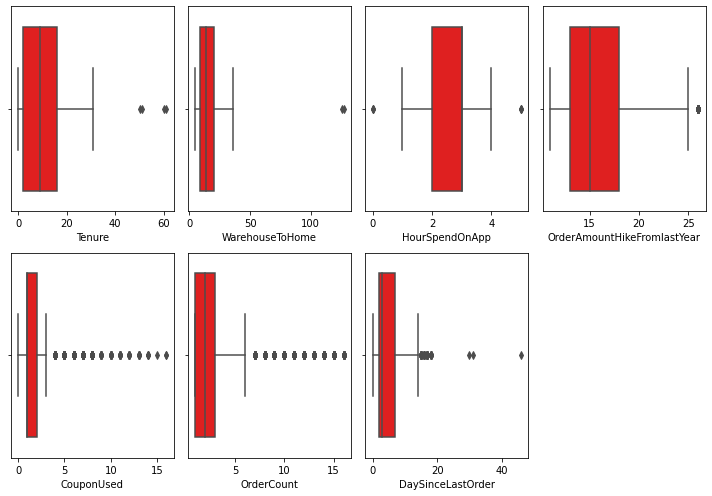

In [13]:
#Individual Box Plot
feature = data_missing
plt.figure(figsize=(10,7))
for i in range(0, len(feature)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data[feature[i]], color='red')
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

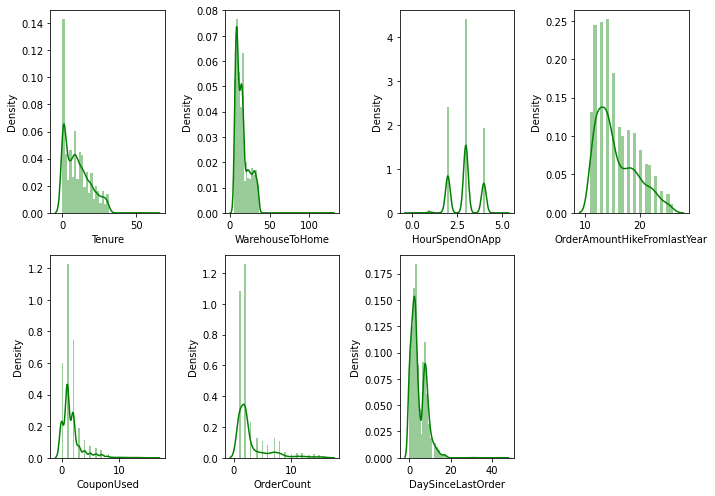

In [14]:
#Individual Distplot
plt.figure(figsize=(10,7))
for i in range(0, len(feature)):
    plt.subplot(2, 4, i+1)
    sns.distplot(data[feature[i]], color='green')
    plt.tight_layout()

1. Untuk 'Tenure', 'WarehouseToHome', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder' terdapat skiew. Oleh karena itu, handle missing value nya menggunakan nilai mean
2. Untuk 'HourSpendOnApp' merupakan distribusi normal, dan handle missing value nya menggunakan nilai modus

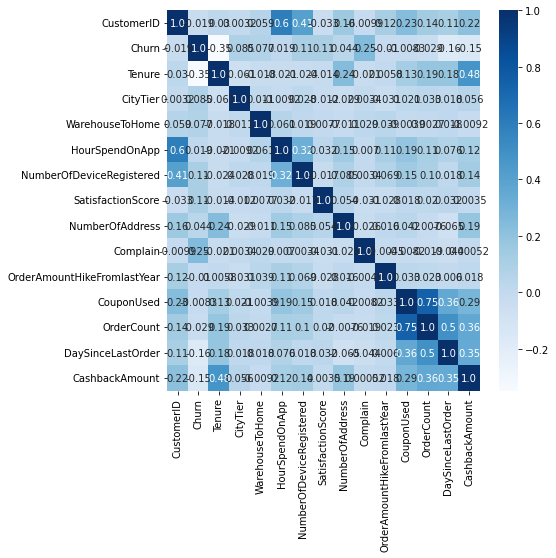

In [16]:
#Correlation Heatmap
plt.figure(figsize=((7,7)))
sns.heatmap(data.corr(), cmap = 'Blues', annot=True, fmt='.2')

<Figure size 1080x1080 with 0 Axes>

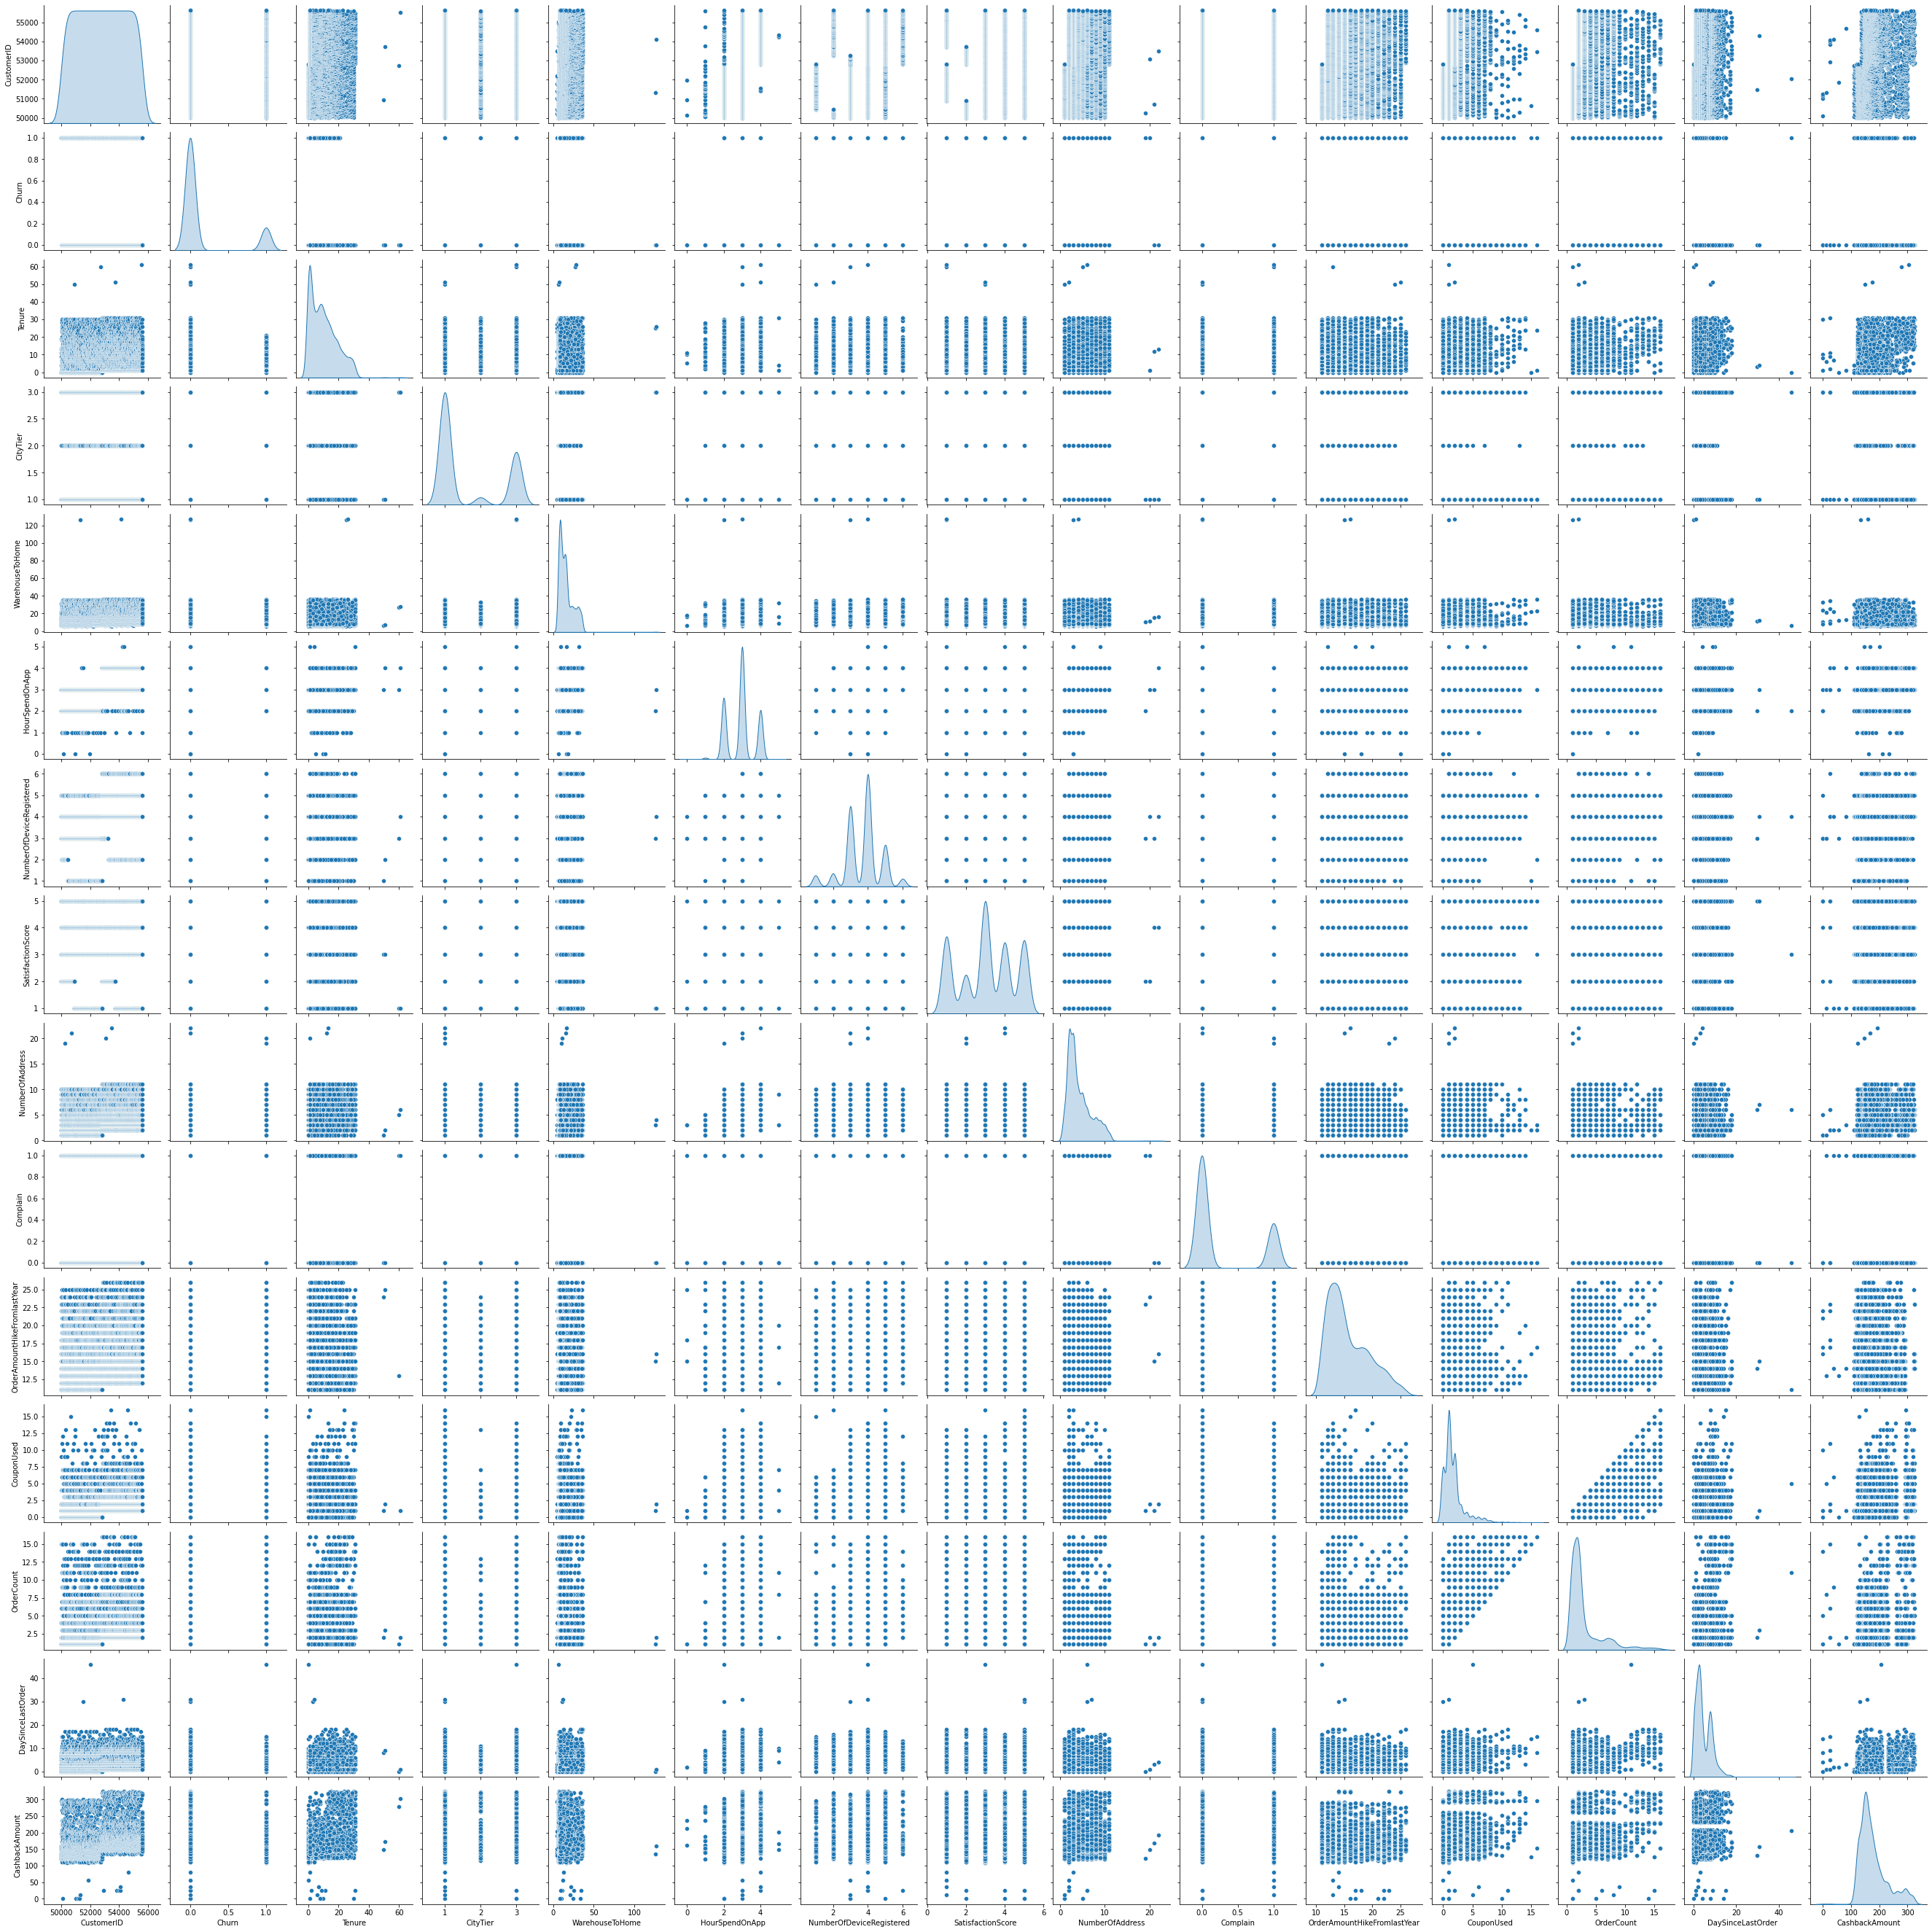

In [17]:
#Pair Plot
plt.figure(figsize=(15,15))
sns.pairplot(data, diag_kind = 'kde')

1. Semakin meningkat jumlah kupon yang digunakan bulan lalu, maka semakin meningkat pula jumlah orderan pada bulan lalu

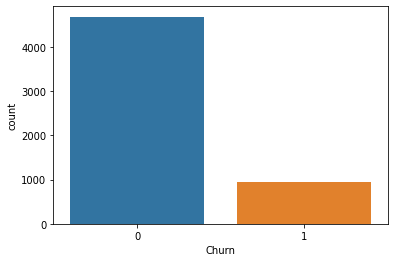

In [38]:
sns.countplot(data=data, x='Churn')

Dari data tersebut terlihat banyak pelanggan yang churn sekitar 1000 dan pelanggan yang tdk berpotensi churn sekitar 5000. Jadi total pelanggan yang berpotensi churn sekitar 16% dari total pelanggan.

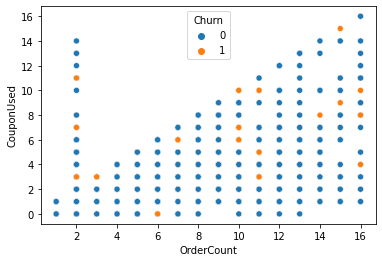

In [39]:
sns.scatterplot(data=data, x='OrderCount', y='CouponUsed', hue='Churn')

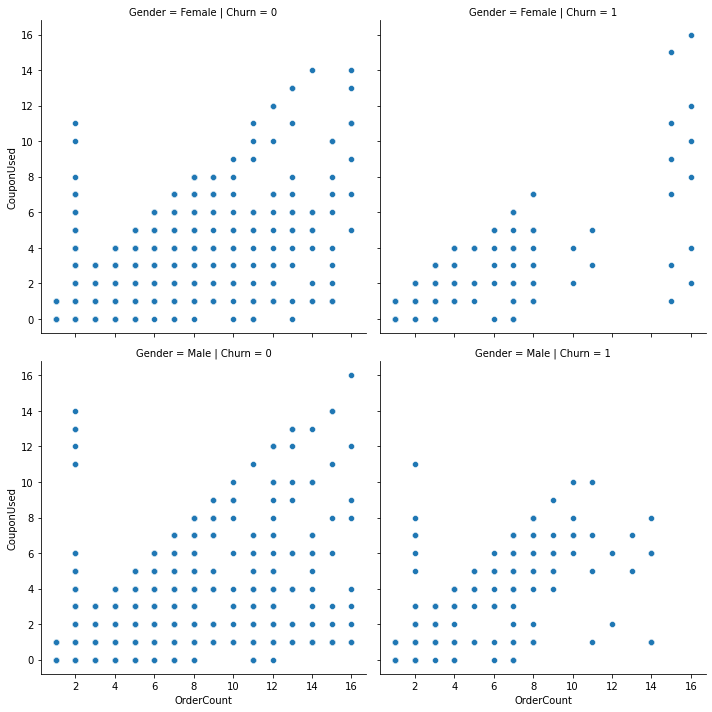

In [40]:
sns.relplot(data=data, x='OrderCount', y='CouponUsed', kind='scatter', col='Churn', row='Gender')

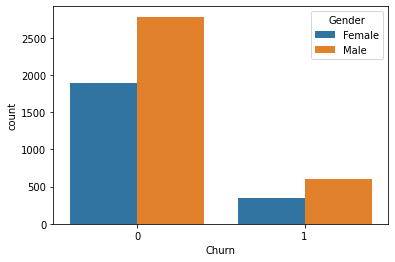

In [41]:
sns.countplot(data=data, x='Churn', hue='Gender')

Pelanggan yang berpotensi churn adalah laki laki dengan total sekitar 600 dan perempuan sekitar 400. Hal tersebut berkemungkinan karena laki" merupakan kepala rumah tangga (berdasar data status pernikahan) dan laki" akan membeli barang sesuai kebutuhan.

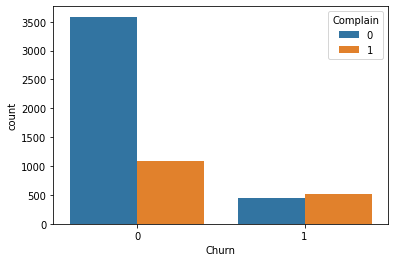

In [42]:
sns.countplot(data=data, x='Churn', hue='Complain')

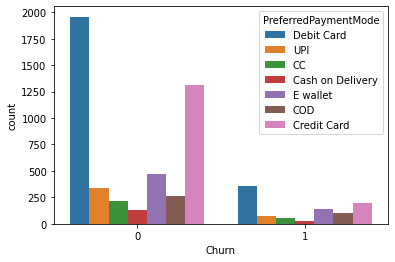

In [43]:
sns.countplot(data=data, x='Churn', hue='PreferredPaymentMode')

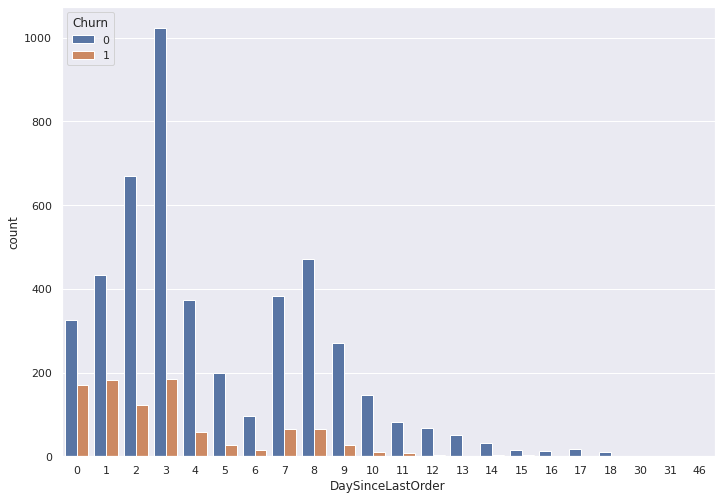

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=data, x='DaySinceLastOrder', hue='Churn')

Pelanggan yang berpotensi churn dan tidak lebih banyak melakukan last order di awal bulan. Hal tersebut kemungkinan di awal bulan adalah hari gajian para pelanggan. Disitu kita dapat memberi lebih banyak voucher di awal dan akhir karena dengan voucher yang diberikan akan menarik pelanggan untuk membeli produk kami krn habis gajian dan untuk voucher diakhir bulan lebih ditingkatkan agar menarik pelanggan membeli produk dengan harga miring karena sudah akhir bulan.

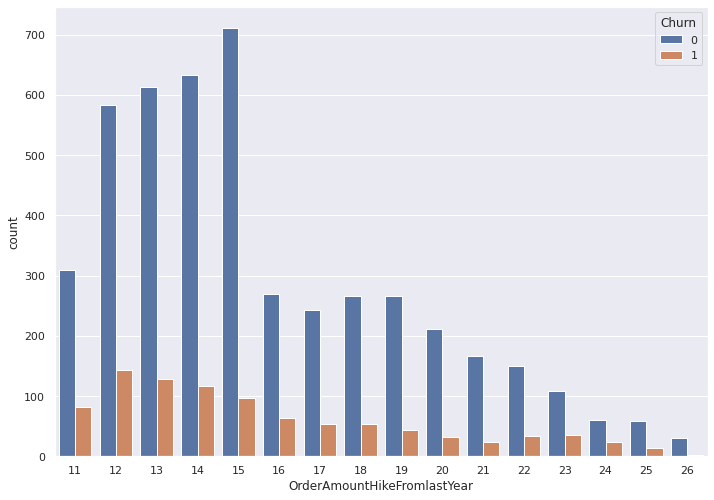

In [45]:
sns.countplot(data=data, x='OrderAmountHikeFromlastYear', hue='Churn')

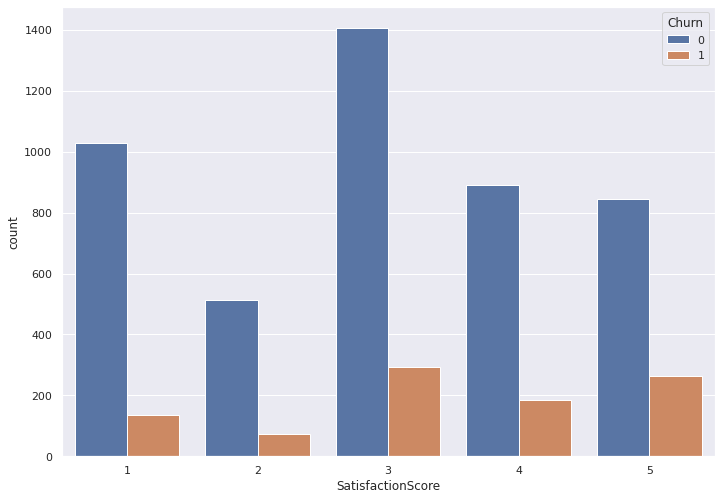

In [46]:
sns.countplot(data=data, x='SatisfactionScore', hue='Churn')

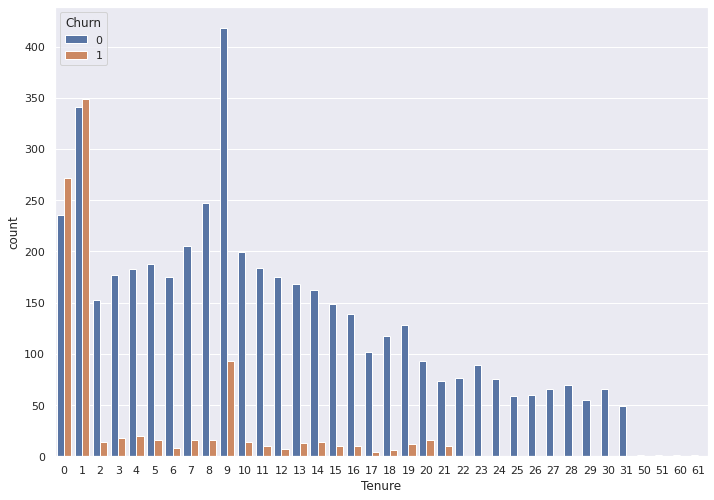

In [47]:
sns.countplot(data=data, x='Tenure', hue='Churn')

Pelanggan yang berpotensi churn memiliki tenure (durasi cust) yang singkat. Namun jika pelanggan yang tidak berpotensi churn memiliki tenure lebih lama namun pergerakannya tidak signifikan. Jadi ada yg singkat dan ada yang lebih lama namun perbedaan nya tidak signifikan (hampir tersebar). Jika yang berpotensi churn hampir seluruhnya memiliki tenure yang singkat.

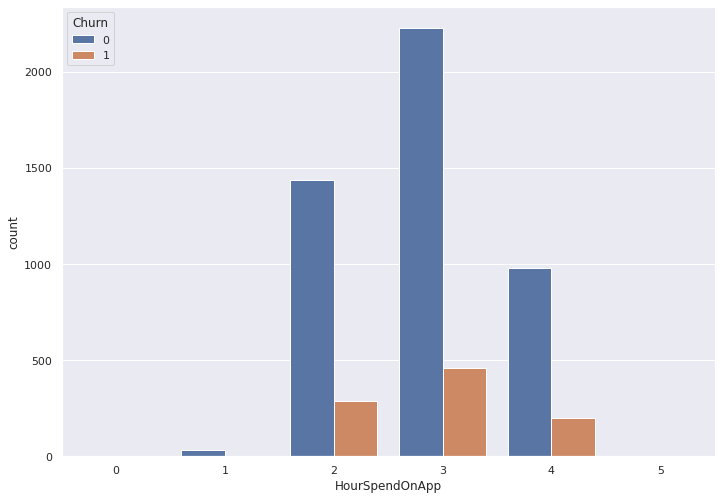

In [51]:
sns.countplot(data=data, x='HourSpendOnApp', hue='Churn')

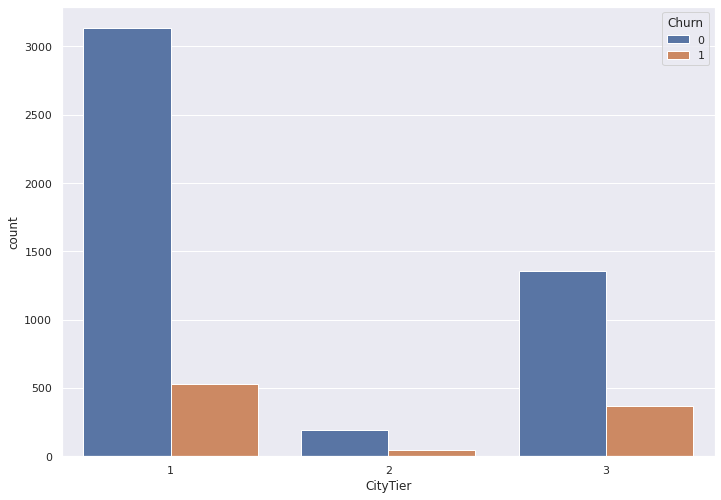

In [49]:
sns.countplot(data=data, x='CityTier', hue='Churn')

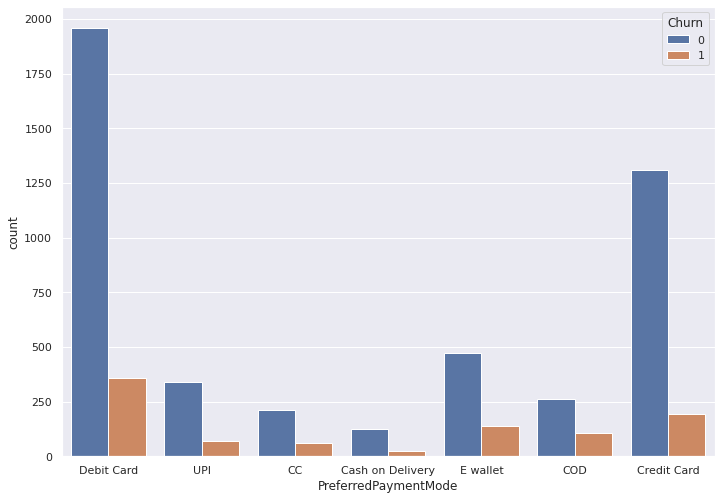

In [50]:
sns.countplot(data=data, x='PreferredPaymentMode', hue='Churn')

In [15]:
#Handle Missing Value
data['Tenure'].fillna(data['Tenure'].median(), inplace=True)
data['WarehouseToHome'].fillna(data['WarehouseToHome'].median(), inplace=True)
data['HourSpendOnApp'].fillna(data['HourSpendOnApp'].mean(), inplace=True)
data['OrderAmountHikeFromlastYear'].fillna(data['OrderAmountHikeFromlastYear'].median(), inplace=True)
data['CouponUsed'].fillna(data['CouponUsed'].median(), inplace=True)
data['OrderCount'].fillna(data['OrderCount'].median(), inplace=True)
data['DaySinceLastOrder'].fillna(data['DaySinceLastOrder'].median(), inplace=True)
data.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [16]:
data.shape

(5630, 20)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [18]:
#merubah tipe data
#float to int
data['Tenure'] = data['Tenure'].astype('int')
data['WarehouseToHome'] = data['WarehouseToHome'].astype('int')
data['HourSpendOnApp'] = data['HourSpendOnApp'].astype('int')
data['OrderAmountHikeFromlastYear'] = data['OrderAmountHikeFromlastYear'].astype('int')
data['CouponUsed'] = data['CouponUsed'].astype('int')
data['OrderCount'] = data['OrderCount'].astype('int')
data['DaySinceLastOrder'] = data['DaySinceLastOrder'].astype('int')
data['CashbackAmount'] = data['CashbackAmount'].astype('int')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CustomerID                   5630 non-null   int64 
 1   Churn                        5630 non-null   int64 
 2   Tenure                       5630 non-null   int64 
 3   PreferredLoginDevice         5630 non-null   object
 4   CityTier                     5630 non-null   int64 
 5   WarehouseToHome              5630 non-null   int64 
 6   PreferredPaymentMode         5630 non-null   object
 7   Gender                       5630 non-null   object
 8   HourSpendOnApp               5630 non-null   int64 
 9   NumberOfDeviceRegistered     5630 non-null   int64 
 10  PreferedOrderCat             5630 non-null   object
 11  SatisfactionScore            5630 non-null   int64 
 12  MaritalStatus                5630 non-null   object
 13  NumberOfAddress              5630

# MODELLING

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x = data.drop(['Churn', 'CustomerID'], axis=1)
y = data['Churn']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, stratify=y, random_state=75)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [23]:
numerical_pipeline = Pipeline([('scaler', MinMaxScaler())])

categorical_pipeline = Pipeline([('onehot', OneHotEncoder())])

In [24]:
from sklearn.compose import ColumnTransformer

In [25]:
preprcessor = ColumnTransformer([('numeric', numerical_pipeline, 
                                  ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']),
                                 ('categoric', categorical_pipeline, 
                                  ['CityTier', 'SatisfactionScore', 'Complain', 'MaritalStatus', 'PreferedOrderCat', 'Gender', 'PreferredPaymentMode', 'PreferredLoginDevice'])])

#Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

pipeline_lr = Pipeline([('prep', preprcessor), ('algo', LogisticRegression())])


In [27]:
pipeline_lr.fit(xtrain, ytrain)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'HourSpendOnApp',
                                                   'NumberOfDeviceRegistered',
                                                   'NumberOfAddress',
                                                   'OrderAmountHikeFromlastYear',
                                                   'CouponUsed', 'OrderCount',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
         

In [28]:
y_predict = pipeline_lr.predict(xtest)

In [29]:
#metode evaluasi
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfustion matrix')                                                    #generate the confusion matrix
print(confusion_matrix(ytest, y_predict))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(ytest, y_predict))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(ytest, y_predict))


confustion matrix
[[1144   27]
 [ 138   99]]

accuracy
0.8828125

classification report
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1171
           1       0.79      0.42      0.55       237

    accuracy                           0.88      1408
   macro avg       0.84      0.70      0.74      1408
weighted avg       0.87      0.88      0.87      1408



In [ ]:
pipeline_lr.score(xtrain, ytrain), pipeline_lr.score(xtest, ytest)

(0.8943628612032212, 0.8828125)

Karena menggunakan model Logistic Regression nilai akurasinya kurang yaitu 0,8. Maka untuk perbaikan digunakan model Random Forest Classifier

#Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([('prep', preprcessor), ('algo', RandomForestClassifier())])

pipeline_rf.fit(xtrain, ytrain)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'HourSpendOnApp',
                                                   'NumberOfDeviceRegistered',
                                                   'NumberOfAddress',
                                                   'OrderAmountHikeFromlastYear',
                                                   'CouponUsed', 'OrderCount',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
         

In [31]:
y_predict = pipeline_rf.predict(xtest)

In [32]:
#metode evaluasi
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfustion matrix')                                                    #generate the confusion matrix
print(confusion_matrix(ytest, y_predict))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(ytest, y_predict))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(ytest, y_predict))


confustion matrix
[[1162    9]
 [  54  183]]

accuracy
0.9552556818181818

classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1171
           1       0.95      0.77      0.85       237

    accuracy                           0.96      1408
   macro avg       0.95      0.88      0.91      1408
weighted avg       0.96      0.96      0.95      1408



Saat digunakan model Random Forest Classifier didapatkan nilai akurasi yang cukup bagus yaitu 0,95. Jadi dapat disimpulkan untuk model yang dipilih adalah model "Random Forest Classifier"

***EXECUTIVE SUMMARY & RECOMMENDATION***

1. Pelanggan yang berpotensi churn adalah pelanggan yang sudah lama bergabung bersama perusahaan, sehingga dapat dibuat kebijakan penambahan benefit bertingkat sesuai dengan masa bergabung customer.
2. Komplain dari customer merupakan masukan yang sangat berharga bagi perusahaan, jika customer melakukan komplain berarti customer peduli pada perkembangan perusahaan. Perusahaan harus memberikan pelayanan komplain sebaik mungkin dan memberikan reward untuk setiap masukan dari customer.
3. Customer yang sudah menikah lebih cenderung churn, hal ini kemungkinan disebabkan karena orang yang sudah menikah cenderung tidak memiliki waktu untuk mengecek kompetitor dan memiliki list belanjaan yang sudah pasti. Untuk itu perlu dibuat periode diskon khsus untuk kebutuhan rumah tangga.
